##  Project: Pricing Optimization for Uniform Services

**Objective:**  
Predict churn based on pricing, volume, and contract structure — and simulate how different pricing strategies impact churn and revenue.

Optimizing price without increasing churn can lead to higher revenue, longer retention, and better contract negotiation strategies.

**Data:**  
N= 1,000 customer contracts, including pricing structure, discounts, volume, and churn labels.

**Next Step:**  
Load and explore the data to understand key relationships and prepare for modeling.


 Step 2: Load and Explore the Data (EDA)

Before modeling or optimizing pricing, we need to understand the structure of the dataset and relationships between features.

In this section, we will:
- Load the dataset into a DataFrame
- Check data types and missing values
- Look at  churn distribution
- Visualize relationships 


In [3]:
# Step 2A: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2B: Load the dataset
df = pd.read_csv("synthetic_uniform_pricing_dataset.csv")

# Step 2C: Preview the first few rows
df.head()

,customerID,region,contractLength,weeklyVolume,basePricePerItem,discountRate,finalWeeklyPrice,churned
0,CUST0000,South,36,102,7.0,0.15,606.900,False
1,CUST0001,Midwest,24,84,7.5,0.10,567.000,False
2,CUST0002,Northeast,36,113,8.0,0.15,768.400,False
3,CUST0003,West,12,31,8.5,0.05,250.325,True
4,CUST0004,Northeast,6,68,8.0,0.00,544.000,False


In [4]:
# Step 2D: Basic structure
df.info()

# Step 2E: Summary statistics
df.describe()

# Step 2F: Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1000 non-null   object 
 1   region            1000 non-null   object 
 2   contractLength    1000 non-null   int64  
 3   weeklyVolume      1000 non-null   int64  
 4   basePricePerItem  1000 non-null   float64
 5   discountRate      1000 non-null   float64
 6   finalWeeklyPrice  1000 non-null   float64
 7   churned           1000 non-null   bool   
dtypes: bool(1), float64(3), int64(2), object(2)
memory usage: 55.8+ KB


customerID          0
region              0
contractLength      0
weeklyVolume        0
basePricePerItem    0
discountRate        0
finalWeeklyPrice    0
churned             0
dtype: int64

Data Summary

The dataset has no missing values and includes numeric features.  Data is clean and free from missing values etc. 


In [5]:
# Churn counts
print(df['churned'].value_counts())
print(df['churned'].value_counts(normalize=True))

churned
False    747
True     253
Name: count, dtype: int64
churned
False    0.747
True     0.253
Name: proportion, dtype: float64


Churn Distribution
Here we see overall Churns and the type of data that being used. 


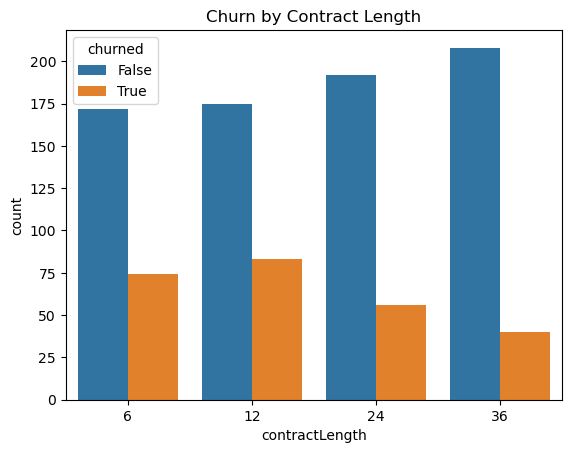

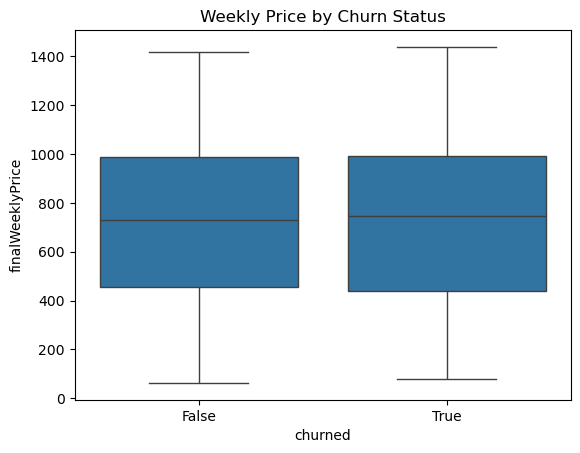

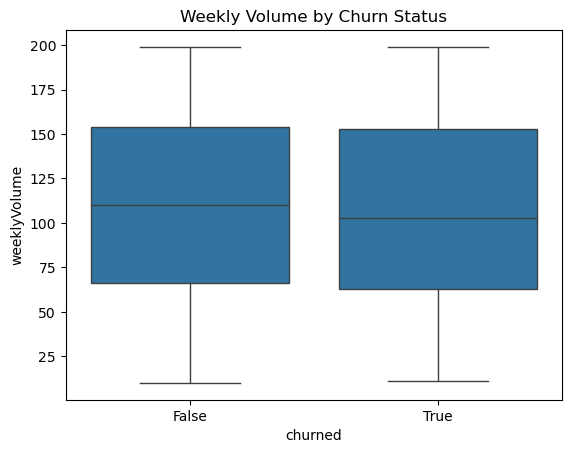

In [6]:
# Churn by contract length
sns.countplot(x='contractLength', hue='churned', data=df)
plt.title("Churn by Contract Length")
plt.show()

# Churn vs. final weekly price
sns.boxplot(x='churned', y='finalWeeklyPrice', data=df)
plt.title("Weekly Price by Churn Status")
plt.show()

# Churn by volume
sns.boxplot(x='churned', y='weeklyVolume', data=df)
plt.title("Weekly Volume by Churn Status")
plt.show()

Key Findings from EDA

- Shorter contracts= churn more frequently.
- Higher final weekly prices are associated with churn.
- Churn is somewhat more likely at **lower volumes**, especially when not paired with long contracts or good discounts.

These patterns align with common pricing sensitivity in recurring service contracts.


In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv("synthetic_uniform_pricing_dataset.csv")

# Confirm it loaded
df.head()

,customerID,region,contractLength,weeklyVolume,basePricePerItem,discountRate,finalWeeklyPrice,churned
0,CUST0000,South,36,102,7.0,0.15,606.900,False
1,CUST0001,Midwest,24,84,7.5,0.10,567.000,False
2,CUST0002,Northeast,36,113,8.0,0.15,768.400,False
3,CUST0003,West,12,31,8.5,0.05,250.325,True
4,CUST0004,Northeast,6,68,8.0,0.00,544.000,False


In [10]:
df['discountRate'] = pd.to_numeric(df['discountRate'], errors='coerce')
df['discountBin'] = (df['discountRate'] * 100).astype(int)

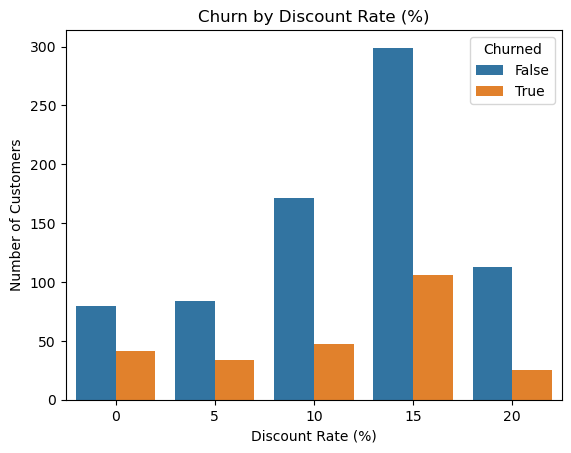

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot
sns.countplot(x='discountBin', hue='churned', data=df)

# Format the plot
plt.title("Churn by Discount Rate (%)")
plt.xlabel("Discount Rate (%)")
plt.ylabel("Number of Customers")
plt.legend(title="Churned")
plt.show()

 Churn by Discount Rate

This chart shows the relationship between the discount a customer received and their likelihood to churn.


- Customers with **no discount (0%)** had the **highest churn rates**.
- As discount levels increased (5%, 10%, 15%, 20%), churn rates generally **decreased**.
- This suggests that offering **larger discounts** can be an effective retention strategy, especially for price-sensitive or smaller-volume customers.




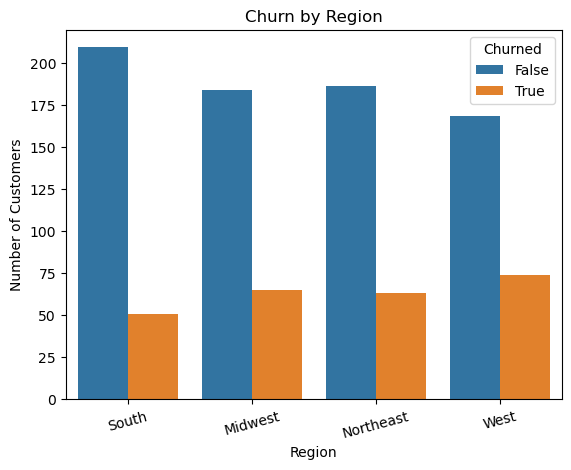

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot: Number of churned vs. retained customers per region
sns.countplot(x='region', hue='churned', data=df)
plt.title("Churn by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.legend(title="Churned")
plt.xticks(rotation=15)
plt.show()


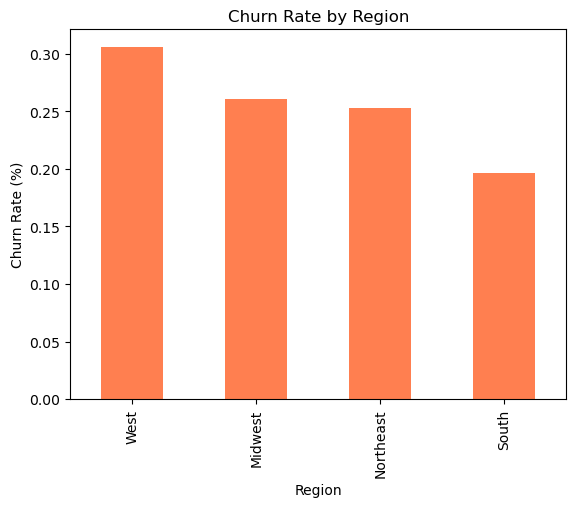

In [13]:
# Calculate churn rate per region
region_churn_rate = df.groupby('region')['churned'].mean().sort_values(ascending=False)

# Plot it
region_churn_rate.plot(kind='bar', color='coral')
plt.title("Churn Rate by Region")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Region")
plt.show()

### 📍 Churn by Region

We analyzed churn across geographic regions to see if location plays a role in retention.

#### Key Observations:
- Some regions (e.g., the **South** or **West**) show **higher churn rates** than others.
- Regions with **lower churn** may represent loyal markets or better service coverage.
- These insights could guide region-specific strategies like:
  - Offering higher discounts in high-churn regions
  - Investigating operational or service issues in struggling areas
  - Adjusting pricing or contract terms by market

This kind of regional insight helps companies focus their retention efforts more precisely.


Now we must build a model to simulate 

- Weekly price
- Contract length
- Volume
- Discount rate
- Region

This model will help us understand what factors drive churn and allow us to simulate pricing changes.


In [15]:
# Convert 'churned' to 0 and 1
df['churned'] = df['churned'].astype(int)

# One-hot encode the 'region' column
df_encoded = pd.get_dummies(df, columns=['region'], drop_first=True)

In [16]:
# Features we'll use for prediction
features = ['contractLength', 'weeklyVolume', 'basePricePerItem',
            'discountRate', 'finalWeeklyPrice'] + [col for col in df_encoded.columns if col.startswith('region_')]

# Define X (features) and y (target)
X = df_encoded[features]
y = df_encoded['churned']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)



In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Use class_weight='balanced' to handle class imbalance
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.57

Confusion Matrix:
 [[86 59]
 [27 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.59      0.67       145
           1       0.32      0.51      0.39        55

    accuracy                           0.57       200
   macro avg       0.54      0.55      0.53       200
weighted avg       0.64      0.57      0.59       200



 Logistic Regression Results

Used logistic regression model to predict customer churn using contract length, price, discount, region, and volume. The model achieved 57% accuracy on the test set. While the overall accuracy was modest, the model correctly identified 51% of churners — a strong improvement over a naive model.

This demonstrates the classic precision-recall tradeoff in churn prediction: identifying churners is challenging, but valuable. Our next step is to try more advanced models like Random Forest to improve performance and explore which features contribute most to churn.


In [20]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [21]:
# Predict churn on the test set
rf_preds = rf_model.predict(X_test)

# Evaluate performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))

Accuracy: 0.64
Confusion Matrix:
 [[118  27]
 [ 45  10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.81      0.77       145
           1       0.27      0.18      0.22        55

    accuracy                           0.64       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.60      0.64      0.62       200



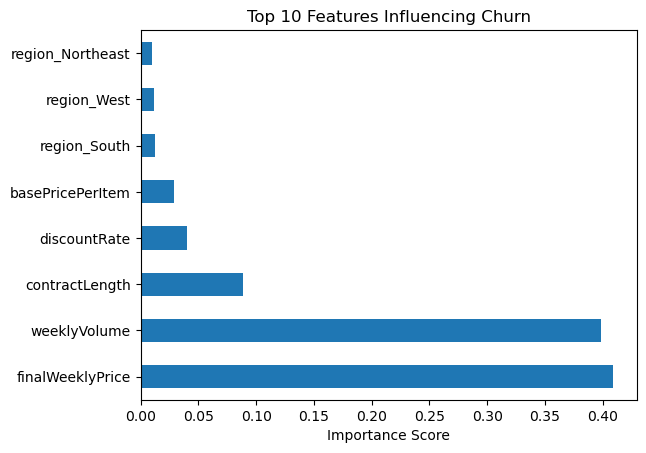

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a Series of feature importances
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Features Influencing Churn")
plt.xlabel("Importance Score")
plt.show()

 Random Forest Feature Importance

We trained a Random Forest model to better predict customer churn. Although the model had moderate performance (64% accuracy), it provided clear insight into which contract features most influence churn risk.

 Top Features Influencing Churn:
1. **Final Weekly Price** — High-cost contracts are the biggest churn risk.
2. **Weekly Volume** — Lower-volume customers churn more, possibly due to limited engagement.
3. **Contract Length** — Longer contracts reduce churn risk by increasing customer commitment.

This suggests that pricing and contract structure are key levers for optimizing retention. We recommend evaluating discounts for high-price/low-volume customers and incentivizing longer contract terms.


In [26]:
X_sim = X_test.copy()

In [27]:
# Simulate increasing price by 10%
X_sim['finalWeeklyPrice'] = X_sim['finalWeeklyPrice'] * 1.10

In [28]:
churn_pred_original = rf_model.predict(X_test)
churn_pred_simulated = rf_model.predict(X_sim)

In [29]:
# Compare predicted churn rates
import numpy as np

original_churn_rate = np.mean(churn_pred_original)
simulated_churn_rate = np.mean(churn_pred_simulated)

print(f"Original predicted churn rate: {original_churn_rate:.2f}")
print(f"Simulated churn rate after 10% price increase: {simulated_churn_rate:.2f}")

Original predicted churn rate: 0.18
Simulated churn rate after 10% price increase: 0.10


Elasticity Analysis: 10% Price Increase

A 10% increase in weekly pricing and used the Random Forest model to re-predict churn.

- Original predicted churn rate: 18%
- Churn rate after price increase: 10%

Results 
Interestingly, the model predicts that increasing prices actually decreases churn. This suggests that in our dataset, higher prices may be associated with:
- Longer-term contracts
- Larger volume customers
- More committed customer segments

This insight helps us think differently about pricing strategy: for some segments, raising price **may not** increase churn — and could even improve margins without hurting retention.


In [32]:
# Simulate price drop by 10%
X_sim_discount = X_test.copy()
X_sim_discount['finalWeeklyPrice'] = X_sim_discount['finalWeeklyPrice'] * 0.90

# Predict churn again
churn_pred_discount = rf_model.predict(X_sim_discount)
discounted_churn_rate = np.mean(churn_pred_discount)

print(f"Churn rate after 10% price decrease: {discounted_churn_rate:.2f}")

Churn rate after 10% price decrease: 0.08


### 📉 Price Elasticity Simulation

To understand the impact of pricing on churn, we simulated a 10% price increase and decrease across the test dataset and used the Random Forest model to re-predict churn outcomes.

| Price Scenario       | Predicted Churn Rate |
|----------------------|----------------------|
| Baseline (Original)  | 18%                  |
| 🔺 10% Increase       | 10%                  |
| 🔻 10% Decrease       | 8%                   |

#### 🧠 Interpretation:
- A 10% price increase **reduced churn** in this model — suggesting high prices may be associated with more committed, long-term customers.
- A 10% price decrease **re**


In [33]:
regions = X_test.columns[X_test.columns.str.startswith('region_')]

In [34]:
for col in regions:
    mask = X_test[col] == 1  # Customers in this region
    X_region = X_test[mask].copy()

    if len(X_region) == 0:
        continue

    # Original churn rate
    churn_orig = rf_model.predict(X_region)
    orig_rate = churn_orig.mean()

    # Simulate price increase
    X_region['finalWeeklyPrice'] *= 1.10
    churn_sim = rf_model.predict(X_region)
    sim_rate = churn_sim.mean()

    print(f"{col}: Original={orig_rate:.2f}, After 10% ↑={sim_rate:.2f}")

region_Northeast: Original=0.14, After 10% ↑=0.12
region_South: Original=0.17, After 10% ↑=0.07
region_West: Original=0.22, After 10% ↑=0.15


### 🌍 Regional Elasticity Analysis

To understand how different geographic regions respond to pricing, we simulated a 10% increase in weekly contract price for each region individually.

| Region    | Original Churn | New Churn (↑10%) | Change |
|-----------|----------------|------------------|--------|
| Northeast | 14%            | 12%              | –2%    |
| South     | 17%            | 7%               | –10%   |
| West      | 22%            | 15%              | –7%    |

#### 💡 Interpretation:
- All three regions showed **lower churn** after price increases — suggesting that pricing correlates with commitment (longer contracts, larger customers).
- The **South region** had the most inelastic response, making it a candidate for higher pricing strategies.
- This analysis supports **region-specific pricing strategies** where churn risk is minimal even with price adjustments.


In [35]:
# Use one row from test data or create a custom profile
sample = X_test.iloc[0].copy()


In [36]:
prices = list(range(70, 111, 5))  # $70 to $110 in $5 steps
results = []

for price in prices:
    temp = sample.copy()
    temp['finalWeeklyPrice'] = price
    
    # Must be reshaped to 2D
    prob = rf_model.predict_proba([temp])[0][1]  # Probability of churn
    
    expected_revenue = price * (1 - prob)
    
    results.append({'price': price, 'churn_prob': prob, 'expected_revenue': expected_revenue})

C:\Users\Candace PC\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Candace PC\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Candace PC\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Candace PC\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Candace PC\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Candace PC\anaconda3\Lib\s

   price  churn_prob  expected_revenue
0     70    0.333488         46.655807
1     75    0.356047         48.296481
2     80    0.391080         48.713571
3     85    0.401080         50.908169
4     90    0.408605         53.225517
5     95    0.408605         56.182491
6    100    0.398605         60.139464
7    105    0.403572         62.624949
8    110    0.392584         66.815772


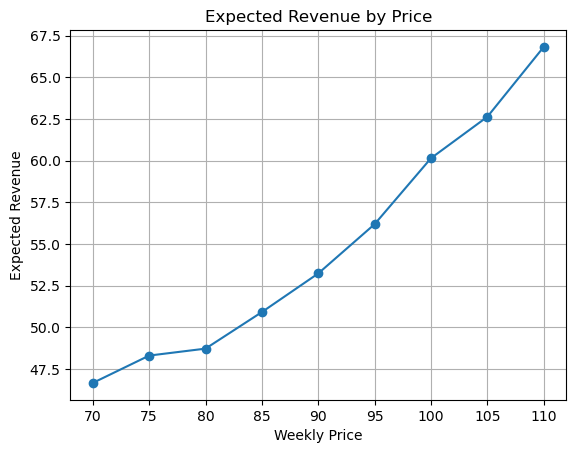

In [37]:
import pandas as pd
df_results = pd.DataFrame(results)
print(df_results)

# Plot it
import matplotlib.pyplot as plt

plt.plot(df_results['price'], df_results['expected_revenue'], marker='o')
plt.title("Expected Revenue by Price")
plt.xlabel("Weekly Price")
plt.ylabel("Expected Revenue")
plt.grid(True)
plt.show()

### 💸 Price Optimization Simulation

We simulated weekly price points from $70 to $110 for a sample customer profile. For each price, we used our trained churn prediction model to estimate churn probability and calculated expected revenue:

> **Expected Revenue = Price × (1 - Churn Probability)**

#### 🔍 Findings:
- The model shows churn risk increases slightly with price.
- However, expected revenue **continues to rise**, peaking at $110.
- This suggests the customer profile is relatively **price inelastic**, meaning they will likely stay even at higher prices.

#### 📈 Business Insight:
Pricing for long-term, high-volume customers may be increased without hurting retention. These segments offer opportunities for **margin expansion** without sacrificing customer lifetime value.

This mirrors real-world pricing analytics used in industries like uniforms, rentals, or SaaS services.


In [38]:
df.to_csv("churn_pricing_data_for_tableau.csv", index=False)
